In [3]:
!pip install ydata_profiling matplotlib

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=40885cc650be48135a74d14c4d9ae6c0ab7e33753e875634388128e9de57bba2
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [4]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dados = pd.read_csv("https://raw.githubusercontent.com/MachineTeachingEdu/JAI2025-IA-Educacao/refs/heads/main/An%C3%A1lise%20de%20Dados/dados_final.csv", sep=',')
dados.head()

,Id,nearestBusStop,backwardsCombine,firstAndLast,singlePigLatin,hasTwoDigits,isEvenPositiveInt,isSubstring,helloWorld,doubleX,...,secondHalf,treasureHunt,mostAnagrams,factorial,fibonacci,gcd,listOfLists,friendOfFriends,findTheCircle,Notas
0,S002,0.750,1.0,1.0,0.8,0.833333,1.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.690317
1,S011,0.875,1.0,1.0,1.0,0.666667,1.0,1.000000,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.823890
2,S014,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549519
3,S020,0.750,1.0,1.0,1.0,0.333333,0.0,0.000000,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.489055
4,S023,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350000


Quais as questões mais difíceis? E as mais fáceis?

1. Menos/Mais respostas de alunos
2. Menores/Maiores médias de acerto

In [6]:
dados = dados[dados['Id'] != 'SA']
dados_semId = dados.drop(["Id"], axis=1)

In [36]:
# prompt: count the values of df columns that are different than 0 per column
# Calculate the count of non-zero values for each column
non_zero_counts = dados_semId.drop("Notas", axis=1)
non_zero_counts = (non_zero_counts == 0).sum()
non_zero_counts.sort_values(ascending=False)
non_zero_counts = non_zero_counts.rename("Não respondidos")
non_zero_counts = pd.DataFrame(non_zero_counts)
non_zero_counts["% de resposta"] = 1 - non_zero_counts["Não respondidos"] / len(dados_semId)
non_zero_counts.sort_values(by="% de resposta", ascending=False)

,Não respondidos,% de resposta
helloWorld,16,0.818182
doubleX,24,0.727273
raiseToPower,31,0.647727
convertToDegrees,35,0.602273
leftoverCandy,43,0.511364
intToFloat,44,0.500000
howManyEggCartons,48,0.454545
findRoot,48,0.454545
kthDigit,54,0.386364
overNineThousand,59,0.329545


In [8]:
dados_semId.mean().sort_values()

,0
findTheCircle,0.000000
treasureHunt,0.000598
mostAnagrams,0.002089
friendOfFriends,0.002392
listOfLists,0.012500
gcd,0.015909
factorial,0.026860
fibonacci,0.028846
createNumberBlock,0.037190
secondHalf,0.045455


Há correlação entre os exercícios terminados?


In [9]:
# prompt: order a dataframe by a specific column order
# Get the sorted column names based on their means (from previous code)
ordem_das_colunas = dados_semId.mean().sort_values(ascending=False).index
# Reindex the dataframe to order the columns
dados_ordenados = dados_semId[ordem_das_colunas]
corr = dados_ordenados.corr()

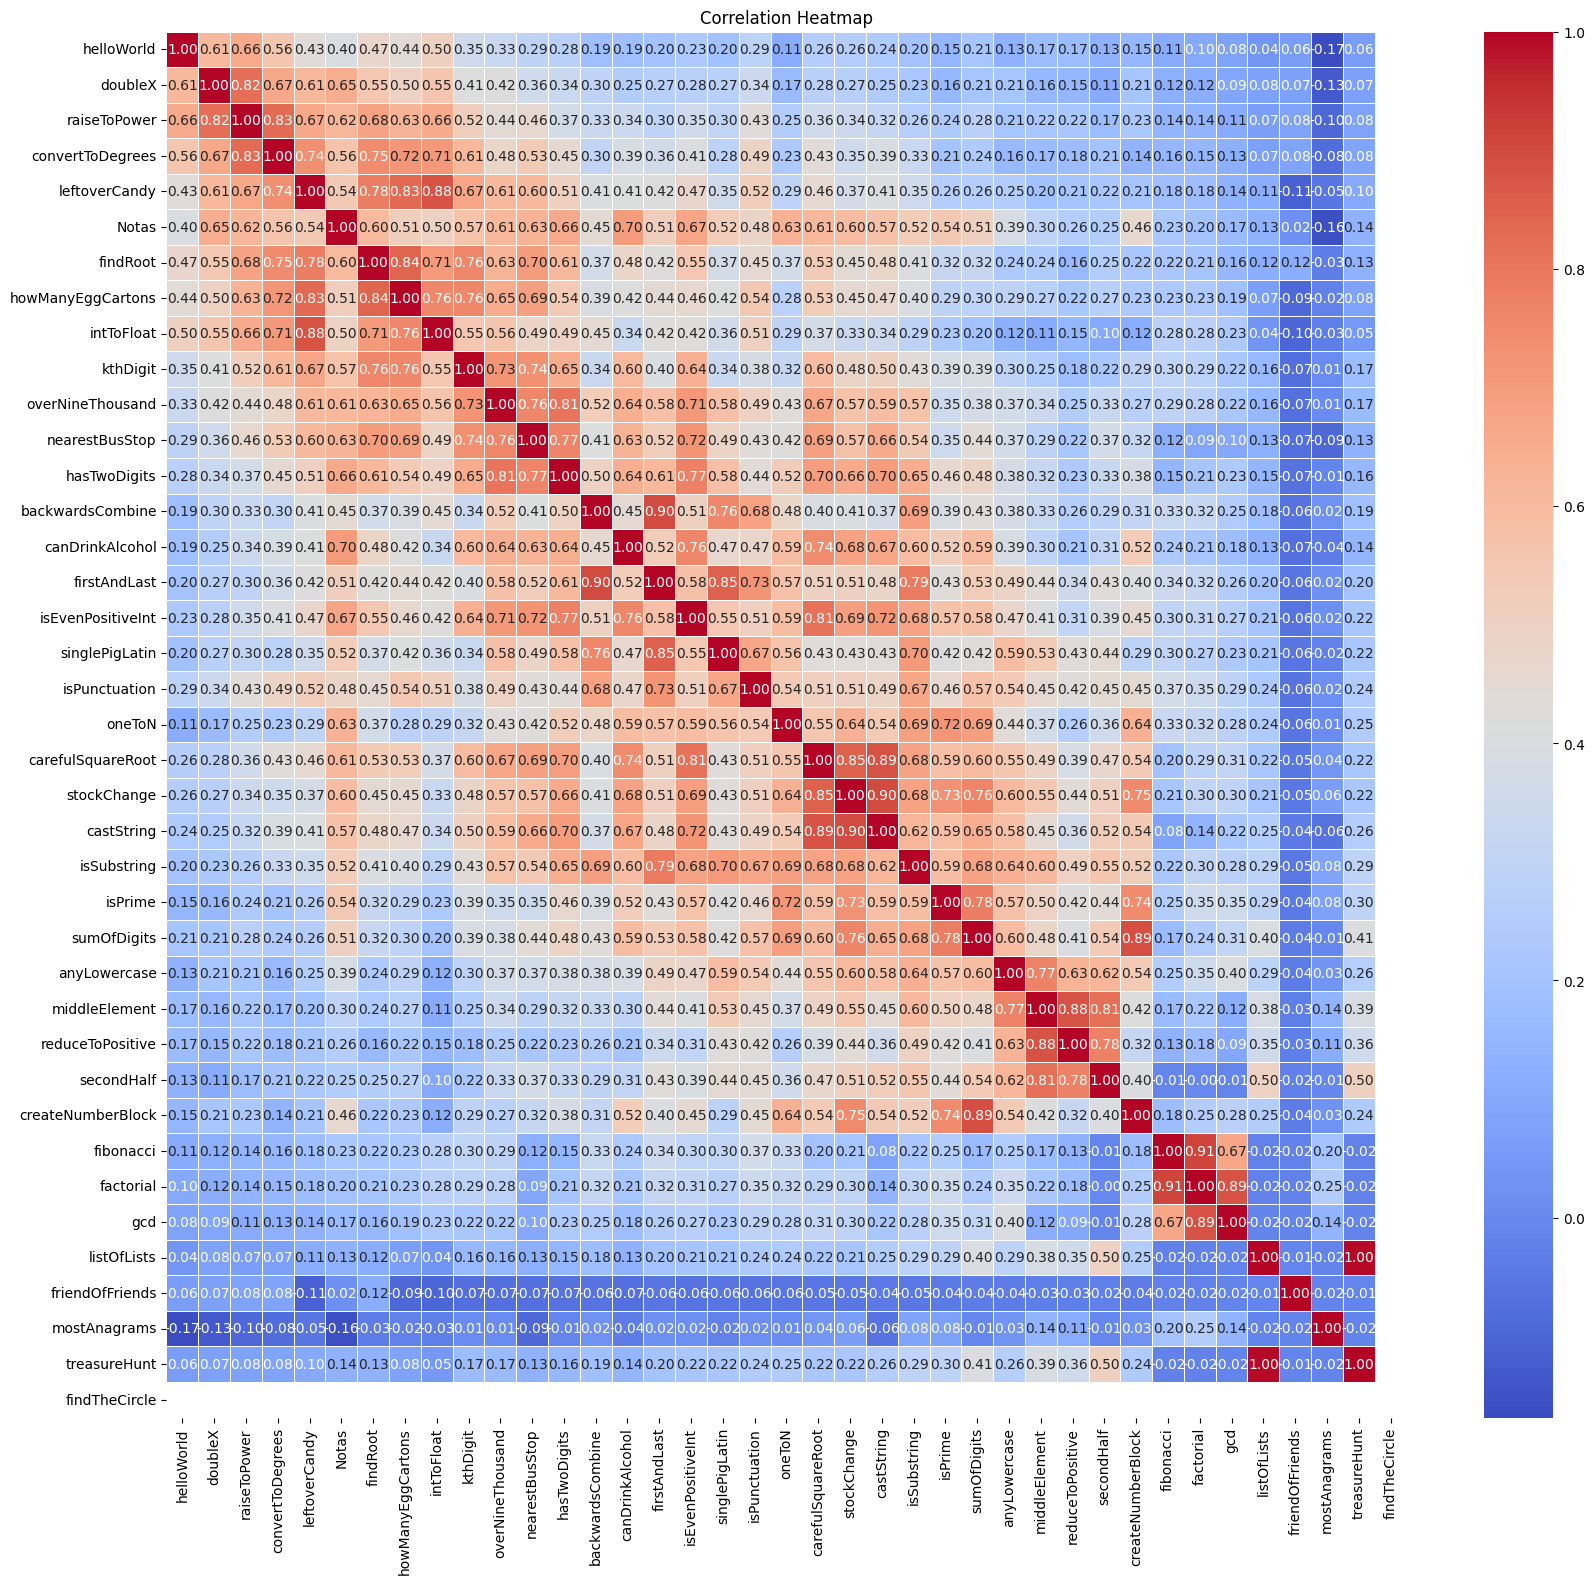

In [10]:
# prompt: make a compact heatmap correlation plot
plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Há correlação entre os alunos?

In [11]:
def filtra_dados(dados, qtdProblemas=5):
  mask = (dados_semId != 0).sum(axis=1) >= qtdProblemas
  dados_filtrados = dados[mask].copy()
  return dados_filtrados

def maiores_correlacoes(dados, corrLimite=0.95):
  corr = dados.T.corr()
  # prompt: select only the highest correlations
  # Extract the correlation values from the upper triangle of the matrix
  correlacoes = corr.mask(np.tril(np.ones(corr.shape)).astype(bool)).stack()

  # Sort the correlation values
  correlacoes_ordenadas = correlacoes.sort_values(ascending=False)
  correlacoes_ordenadas = correlacoes_ordenadas[correlacoes_ordenadas > corrLimite]

  correlacoes_list = [item for sublist in list(correlacoes_ordenadas.index) for item in sublist]
  ids = set(correlacoes_list)

  return (correlacoes_ordenadas, ids)


# correlacoes = maiores_correlacoes(dados_ordenados)
correlacoes, ids = maiores_correlacoes(filtra_dados(dados_ordenados, 5), 0.98)
print("Diferentes ids:", len(ids))
print("Highest correlations:")
print(correlacoes)

Diferentes ids: 16
Highest correlations:
26  34    0.999410
39  87    0.999183
26  41    0.998571
34  41    0.998551
15  41    0.996523
20  37    0.996291
26  51    0.993412
34  51    0.992417
15  34    0.991011
    26    0.990751
42  67    0.990128
17  87    0.989681
    39    0.989357
41  51    0.988147
56  59    0.987037
72  84    0.986006
dtype: float64


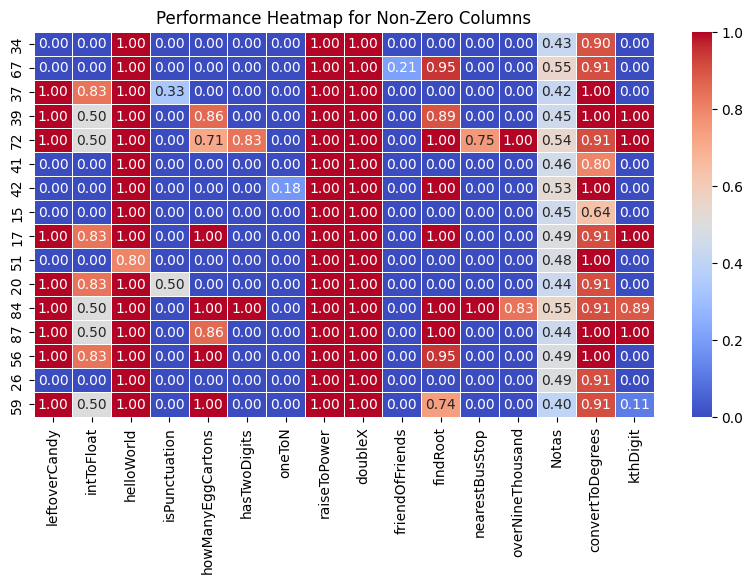

In [12]:
# prompt: given two indices in a df, create a heatmap containing only the columns that are non zero in both indices

def heatmap_nonzero_cols(df, ids):
  """
  Creates a heatmap containing only the columns that are non-zero
  in both specified indices of the DataFrame.

  Args:
    df: The input pandas DataFrame.
    ids: Indices a serem colocados no plot
  """
  # Get the rows at the specified indices
  df_subset = pd.DataFrame()
  col_list = []
  for id in ids:
    row = df.loc[id]
    col_list += list(row.index[(row != 0)])
    df_subset = pd.concat([df_subset, row], axis=1)
  df_subset = df_subset.T

  # Find columns where both values are non-zero
  non_zero_cols = df_subset[list(set(col_list))]
  if non_zero_cols.empty:
    print(f"No common non-zero columns found")
    return

  # Create the heatmap
  plt.figure(figsize=(10, 5))
  sns.heatmap(non_zero_cols, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
  plt.title(f'Performance Heatmap for Non-Zero Columns')
  plt.show()

heatmap_nonzero_cols(dados_ordenados, ids)

Quais problemas possuem maior correlação com a variável-alvo (nota)?

In [14]:
# prompt: find the columns with highest correlation with "notas" column

corr_with_notas = corr['Notas'].sort_values(ascending=False)
print("Colunas com a maior correlação com 'notas':")
corr_with_notas

Colunas com a maior correlação com 'notas':


,Notas
Notas,1.000000
canDrinkAlcohol,0.699680
isEvenPositiveInt,0.672752
hasTwoDigits,0.658411
doubleX,0.647651
oneToN,0.633903
nearestBusStop,0.629422
raiseToPower,0.620315
carefulSquareRoot,0.611942
overNineThousand,0.609113


E se utilizarmos somente os problemas mais respondidos, será que já é possível ter alguma ideia da variável-alvo?

In [38]:
most_answered = non_zero_counts[non_zero_counts["% de resposta"] > 0.50]
most_answered

,Não respondidos,% de resposta
helloWorld,16,0.818182
doubleX,24,0.727273
raiseToPower,31,0.647727
convertToDegrees,35,0.602273
leftoverCandy,43,0.511364


In [44]:
# prompt: find the columns with highest correlation with "notas" column

corr_with_notas = corr[list(most_answered.index)].loc["Notas"].sort_values(ascending=False)
print("Colunas com a maior correlação com 'notas':")
corr_with_notas

Colunas com a maior correlação com 'notas':


,Notas
doubleX,0.647651
raiseToPower,0.620315
convertToDegrees,0.563497
leftoverCandy,0.541992
helloWorld,0.400915
